In [13]:
from utils.StegoPy import encode_img, decode_img, encode_msg, decode_msg
from utils.utils import load_udh_mnist, load_ddh_mnist, load_data, use_lsb, use_ddh, use_udh
import numpy as np
import matplotlib.pyplot as plt

In [3]:
train_loader, test_loader = load_data("mnist")

0it [00:00, ?it/s]

Extracting ../data/MNIST/raw/train-images-idx3-ubyte.gz to ../data/MNIST/raw
Using downloaded and verified file: ../data/MNIST/raw/train-labels-idx1-ubyte.gz
Extracting ../data/MNIST/raw/train-labels-idx1-ubyte.gz to ../data/MNIST/raw
Using downloaded and verified file: ../data/MNIST/raw/t10k-images-idx3-ubyte.gz
Extracting ../data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../data/MNIST/raw
Using downloaded and verified file: ../data/MNIST/raw/t10k-labels-idx1-ubyte.gz
Extracting ../data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/MNIST/raw
Processing...


/Users/probinet/opt/anaconda3/lib/python3.8/site-packages/torchvision/datasets/mnist.py:480: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /Users/distiller/project/conda/conda-bld/pytorch_1603740477510/work/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


Done!


In [10]:
inputs, labels = next(iter(test_loader))

In [14]:
idxs = []
for i in range(10):
    idx = np.random.randint(inputs.shape[0])
    while labels[i] == labels[idx]:
        idx = np.random.randint(inputs.shape[0])
    idxs.append(idx)
covers = inputs[:10]
secrets = inputs[idxs]

if covers.max() <= 1:
    covers = covers.clone().detach()*255
    secrets = secrets.clone().detach()*255
#
# Steg hide
#
containers = encode_img(covers, secrets, train_mode=True) # steg function is on pixels [0, 255]
reveal_secret = decode_img(containers, train_mode=True)
#
# Sanitize if sanitzer included
#

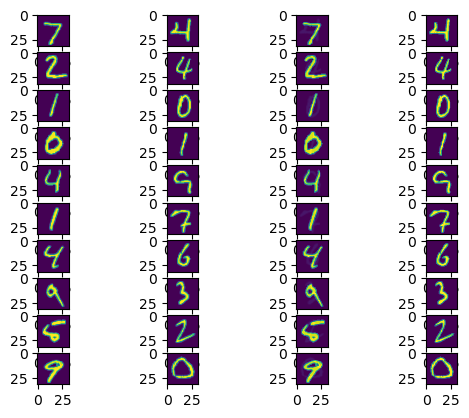

In [18]:
fig, ax = plt.subplots(10, 4)

for i in range(10):
    ax[i, 0].imshow(covers[i].permute(1, 2, 0))
    ax[i, 1].imshow(secrets[i].permute(1, 2, 0))
    ax[i, 2].imshow(containers[i].permute(1, 2, 0))
    ax[i, 3].imshow(reveal_secret[i].permute(1, 2, 0))
    
plt.show()